## **Laboratorio 14: Clasificación por Regresión Logística**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440:** Fundamentos de Machine Learning

**Nombres de los integrantes**


1.   Laura Julieth Carretero Serrano
2.   Juan David Rios Nisperuza

**Número del grupo**

*3*


# **Modelo de Regresión Logística**

La Regresión Logística es una técnica de clasificación binaria que modela la probabilidad de que un predictor (o conjunto de predictores) pertenezca a una clase determinada utilizando una función logística (sigmoide) aplicada a una combinación lineal de las variables de entrada:

\begin{align*}
  P(y=1|x) = \frac{1}{1 + e^{-( w^Tx+b)}} 
\end{align*}

Donde $w$ son los coeficientes del plano (o *pesos*), $b$ el intercepto (o *bias*) y $x$ las variables asociadas a las características de los datos, es decir: $x,w \in \mathbb{R}^n$ y $b \in \mathbb{R}$. El objetivo del entrenamiento es determinar los valores óptimos de los parámetros $w$ y $b$ de forma que las predicciones probabilísticas se ajusten lo mejor posible a las etiquetas reales en los datos de entrenamiento (es decir, dentro del paradigma de Machine Learning Supervisado).

*Nota:* Es importante aclarar que el plano $w^Tx+b = 0$ se conoce como **frontera de decisión**. En el caso de la Regresión Logística, este plano existe en el espacio de características, pero no representa directamente la separación de los datos que retorna el modelo. En su lugar, esta frontera ajusta los datos para calcular la probabilidad de pertenencia a una clase específica. El modelo no retorna una separación espacial como tal sino una probabilidad, y la decisión final (la clase a la que pertenece cada instancia del conjunto de datos) depende si esta supera un umbral predefinido (por lo general 0.5).

**1. Fundamento teórico**

Supongamos un conjunto de $m$ observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
\end{align*}

Donde cada $x^{(i)}$ corresponde a un predictor y cada $y^{(i)}$ corresponde a una de las dos clases a la que pertenece dicho predictor. Cada clase será representada con los valores 1 y 0, que se conocen respectivamente como *clase positiva* y *clase negativa*. La probabilidad de que una instancia de estas observaciones pertenezca a una de las dos clases esta dada por la distribución de la función logística:

\begin{align*}
   \hat{p} = \sigma(t) = \frac{1}{1 + e^{-t^{(i)}}} 
\end{align*}

Donde $\hat{p} \in [0,1]$ corresponde a la probabilidad predicha y $t^{(i)} \in \mathbb{R}$ se conoce como *score lineal* y corresponde a un ajuste lineal de los datos:

\begin{align*}
   t^{(i)} = b + w_{i}x^{(i)}
\end{align*}

Dada la probabilidad predicha, el modelo determina la clase a la que pertenece la instancia $x^{(i)}$ de acuerdo al siguiente umbral:

\begin{align*}
   \hat{y} = \left\{
\begin{array}{l}
  0, \text{si} \; \hat{p} < 0.5 \\
  1, \text{si} \; \hat{p} \geq 0.5
\end{array}
\right.
\end{align*}

**Nota**: Debido a su comportamiento en forma de $S$, la función logística hace parte las llamadas funciones *sigmoides*. Este grupo de funciones tienen un amplio uso dentro de algunos modelos de Deep Learning como funciones de activación neuronal.

**2. ¿Cómo se entrena el modelo ?**

Entrenar un modelo de Regresión Logística implica determinar los valores óptimos de los parámetros $w_1, b$ que ajusten de la mejor forma las predicciones probabilísticas, $\hat{y}$, a las clases reales de los datos observados, $y$. Para ello, como ya lo estudiamos en el modelo de Regresión Lineal, es necesario definir una **función de pérdida** adecuada, cuya optimización reduzca el error entre la predicción $\hat{y}$ y el valor real $y$. Para el caso de un problema de clasificación, esta función de pérdida se conoce como **log loss** y se define como sigue:

$$
L(w,b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}ln(\hat{p}^{(i)}) + (1-y^{(i)})ln(1 - \hat{p}^{(i)}) \right]
$$

Siendo $m$ el número de observaciones, $\hat{p}^{(i)}$ la predicción de la probabilidad y $y^{(i)}$ la etiqueta real. Veamos cómo actua esta función de pérdida para una sola observación:

1. Si $y=1$ para $x$, entonces la función de pérdida se reduce a la expresión $L= -ln(p)$. Si $p$ tiende a cero para $x$, $L$ tiende a $-\infty$ por lo que la función de pérdida penaliza que se estime de forma equivocada la probabilidad de la clase positiva.

2. Si $y=0$ para $x$, entonces la función de pérdida se reduce a la expresión $L= -ln(1-p)$. Si $p$ tiende a uno para $x$, $L$ tiende a $-\infty$ por lo que la función de pérdida penaliza que se estime de forma equivocada la probabilidad de la clase negativa.

Así, *la función de pérdida se acerca a cero si (1-p) se acerca a 1 para una instancia de clase negativa o p se acerca a 1 para una instancia de clase positiva*. Ahora, ya que entendemos el funcionamiento de la función de pérdida, basta encontrar los parámetros óptimos $w,b$ que mejor ajustan los datos. Para ello basta con minimizar la función de pérdida respecto a estos parámetros:

$$
  \min_{w,b\in\mathbb{R}} L(w,b).
$$

Lamentablemente esta ecuación no admite una solución analítica. No obstante, la función de pérdida *log loss* es convexa así que pueden usarse algoritmos como el Descenso de Gradiente (o cualquier otro algoritmo de optimización) para hallar el minimizador y podemos garantizar que, bajo las condiciones adecuadas de convergencia, este minimizador corresponde al mínimo global. Obtenidos $w$ y $b$, el modelo de Regresión Logística entrenado puede usarse para predecir la clase a la que pertenecen datos no vistos. 

# **Contexto del problema**

Uno de los tipos de cáncer más común entre la población femenina es el cáncer de seno. Éste ocurre cuando las células normales mutan y se transforman en células cancerígenas. Esta transformación puede ser evaluada a través de procedimientos en los que se extraen muestras de tejido y se observan bajo el microscopio. Se ha mostrado que en etapas tempranas el núcleo de las células provenientes de los tumores cambia su morfología, permitiendo predecir el desarrollo del cáncer (Narasimha et al., 2013).

En este laboratorio vamos a entrenar un modelo de Regresión Logística para determinar si las células provenientes de un tumor están en proceso de mutación carcinogénica o no, es decir, implementaremos un modelo de clasificación, una tarea que hace parte del paradigma de Aprendizaje Supervisado en Machine Learning.

Para entrenar el modelo usaremos una base de datos que consta de 469 muestras obtenidas de dos tipos de pacientes: mujeres que desarrollaron cáncer de seno y aquellas que no. Clasificaremos dicha aparición a partir de dos características que se extraen de las imágenes: el **radio promedio** y el **índice de suavidad** (_smoothness index_) de los núcleos de las células. Esta última medida hace referencia a un índice de variación local del radio en un mismo núcleo: conforme más pequeño sea el índice de suavidad, más redondo será el núcleo. Estas medidas se toman a partir de una imagen del tejido, como se muestra en la Figura 1.

<center> Figura 1. Muestras de núcleos celulares de biopsias de tumores de seno, los núcleos pequeños y redondos proceden de muestras no-cancerígenas (Narasimha et al., 2013). </center>

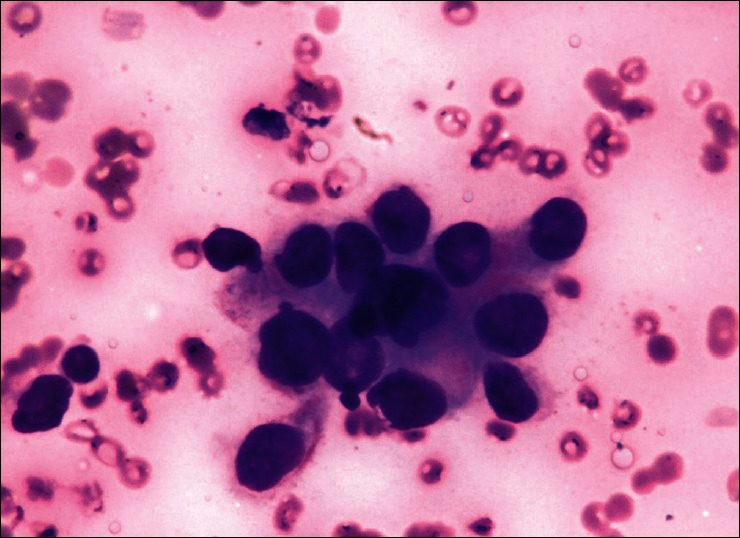

> Narasimha, A., Vasavi, B., & Kumar, H. M. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. _International Journal of Applied and Basic Medical Research_, 3(1), 22.


# **Ejercicios**

1. Importe los datos del archivo *Breast_Cancer_Train.csv*. Este archivo se compone de tres columnas: las dos primeras corresponden a los valores del radio promedio y del índice de suavidad medidos en las muestras y la tercera columna, de encabezado _"Pronostic"_, corresponde al pronóstico de estas:

- $1$ si la muestra proviene de un tumor maligno.
- $0$ si la muestra proviene de un tumor benigno.

Haga un gráfico de dispersión entre el radio promedio y el índice de suavidad agregando el pronóstico como barra de color. Analice la gráfica resultante.

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

Breast_Cancer_Train = pd.read_csv("Breast_Cancer_Train.csv")

pronostic = Breast_Cancer_Train["pronostic"].to_numpy()
radius_mean = Breast_Cancer_Train["radius_mean"].to_numpy()
smoothness_mean = Breast_Cancer_Train["smoothness_mean"].to_numpy()

Breast_Cancer_Train 

,pronostic,radius_mean,smoothness_mean
0,1,16.02,0.08206
1,0,12.32,0.10280
2,0,12.85,0.07551
3,1,14.90,0.09947
4,1,18.61,0.09440
...,...,...,...
449,0,13.03,0.08983
450,0,11.89,0.09773
451,0,13.00,0.08369
452,0,14.20,0.08931


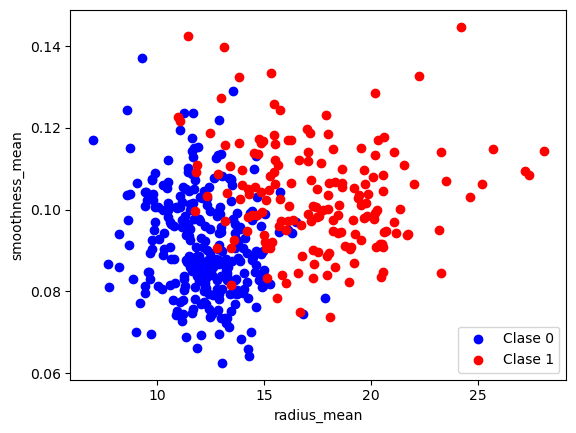

In [2]:
plt.scatter(radius_mean[pronostic == 0], smoothness_mean[pronostic == 0], color='blue', label='Clase 0')
plt.scatter(radius_mean[pronostic == 1], smoothness_mean[pronostic == 1], color='red', label='Clase 1')
plt.xlabel("radius_mean")
plt.ylabel("smoothness_mean")
plt.legend()

2. Note que los valores de la característica *smoothness* se encuentran en el intervalo $[0.06215, 0.1447]$, mientras que los valores de la característica *radius* yacen en el intervalo  $[7.691, 28.11]$. Esta diferencia de escala entre los dos predictores afecta directamente la estimación de los parámetros $w$ y $b$ que definen la frontera de decisión  obligando al ajuste a dar prioridad a una característica sobre la otra. Una forma de atender esta dificultad consiste en estandarizar (o normalizar) los datos de modo que se anule la diferencia de escala. Para ello podemos usar la función `StandardScaler` de la librería `sklearn` de la siguiente forma:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Donde `X` es la matriz que condensa las observaciones dentro del modelo lineal que ajusta la frontera de decisión:

\begin{align*}
  X =
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} & ⋯ & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & ⋯ & x_n^{(2)} \\
    \vdots & \vdots & \ddots & \vdots\\
    x_1^{(m)} & x_2^{(m)} & ⋯ & x_n^{(m)}
  \end{bmatrix}
\end{align*}

Donde $x_i^{(j)}$ es la observación $j$ para la característica $i$. De modo que, 

$$
X \theta + b = 0
$$

Con $\theta = [w_1 w_2 ... w_n]^T$

Implemente una función que reciba los arreglos de las observaciones y retorne el arreglo con los datos estandarizados. Luego repita el gráfico del punto anterior pero considerando ahora los datos estandarizados.

In [3]:
from sklearn.preprocessing import StandardScaler

def standarized_data(data):
    m = len(data[0])
    n = len(data)

    X = np.ones((m,n))

    for i in range(m):
        for j in range(n):
            X[i][j] = data[j][i]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled

In [4]:
X_scaled = standarized_data([radius_mean,smoothness_mean])

3. Para entrenar un modelo de Clasificación por Regresión Logística podemos utilizar el método `.fit()`  del objeto `LogisticRegression()` de la librería `sklearn.linear_model` de la siguiente forma:

```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)
```

Donde `y` es el vector de etiquetas,

\begin{align*}
  y = \left[ y^{(1)}, y^{(2)}, ..., y^{(m)}\right]^T
\end{align*}

Una vez entrenado el modelo se pueden obtener los parámetros óptimos $w$ y $b$ estimados utilizando los atributos `.coef_` e `.intercept_` del objeto `model()`:

```
w = model.coef_.flatten()
b = model.intercept_

```
Implemente una función que tome por argumentos los datos estandarizados y el arreglo con las etiquetas, y retorne un diccionario con el modelo entrenado y los parámetros $w$ y $b$.

In [5]:
from sklearn.linear_model import LogisticRegression

def Model(X_scaled,y):
    model = LogisticRegression()
    model.fit(X_scaled, y)

    return {"model": model, "w": model.coef_.flatten(), "b":model.intercept_} 

In [6]:
modelo = Model(X_scaled, pronostic)
modelo

{'model': LogisticRegression(),
 'w': array([3.60420497, 1.37867832]),
 'b': array([-0.73345291])}

4. Grafique nuevamente la dispersión de los datos estandarizados pero incluya ahora la frontera de decisión que definen los parámetros óptimos $w$ y $b$.

In [7]:
w = modelo['w']
b = modelo['b']

x1_vals = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]

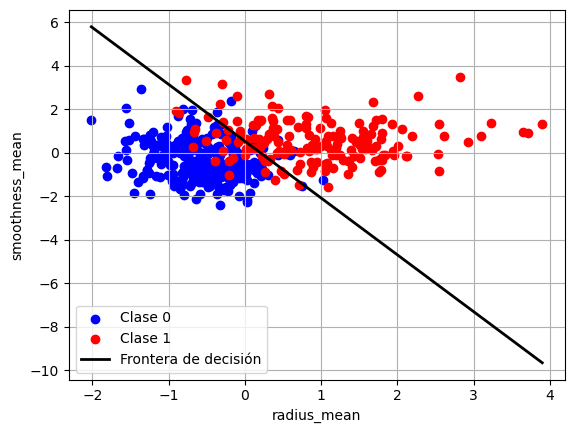

In [8]:
plt.scatter(X_scaled[pronostic == 0, 0], X_scaled[pronostic == 0, 1], color='blue', label='Clase 0')
plt.scatter(X_scaled[pronostic == 1, 0], X_scaled[pronostic == 1, 1], color='red', label='Clase 1')
plt.plot(x1_vals, x2_vals, color='black', linewidth=2, label='Frontera de decisión')

plt.xlabel("radius_mean")
plt.ylabel("smoothness_mean")
plt.legend()
plt.grid()

5. Para evaluar el rendimiento del modelo utilizamos una métrica (score) sobre datos no vistos durante el proceso de entrenamiento. De acuerdo al valor de la métrica, podemos establecer la generalidad y robustez del modelo. Una métrica usual en la tarea de clasificación consiste en calcular el porcentaje de datos correctamente clasificados con respecto al total de datos.

Implemente una función que utilice el modelo que ya entrenó y uselo para evaluar su rendimiento y los datos de validación tomados del archivo *Breast_Cancer_Test.csv* (la función debe tomar por argumentos este modelo, la matriz H con los nuevos datos y las etiquetas de los nuevos datos). Finalmente retorne el porcentaje de datos bien clasificados con respecto al total de datos. Recuerde que el modelo se entrenó utilizando los datos estandarizados, por lo cual es necesario estandarizar los datos importados del archivo *Breast_Cancer_Test.csv* antes de evaluarlos. **Hint**: Consulte en la documentación de Scikit-Learn cómo se utiliza el método `predict()` del objeto `LogisticRegression()`. 

In [9]:
Breast_Cancer_Test = pd.read_csv("Breast_Cancer_Test.csv")

pronostic_new = Breast_Cancer_Train["pronostic"].to_numpy()
radius_mean_new = Breast_Cancer_Train["radius_mean"].to_numpy()
smoothness_mean_new = Breast_Cancer_Train["smoothness_mean"].to_numpy()


In [10]:
from sklearn.metrics import accuracy_score

def evaluate(model,x,y):
    X_scaled = standarized_data(x)
    predict = model.predict(X_scaled)
    acc = accuracy_score(y, predict) * 100
    return acc


value = evaluate(modelo["model"],[radius_mean_new,smoothness_mean_new],pronostic_new)
value

91.18942731277532

6. En general, la frontera de decisión no tiene un comportamiento lineal tan marcado como el que observamos en los datos anteriores, sino que sigue comportamientos más complejos. Para analizar esto, importe los datos del archivo *classification_train.txt* en donde las dos primeras columnas $(X,Y)$ corresponden a las observaciones y la tercera columna ($Z$) a las etiquetas. Luego, haga un gráfico de dispersión entre $X$ y $Y$ agregando la etiqueta $Z$ como barra de color.

In [11]:
Classification_Train = pd.read_csv("classification_train.txt",sep="\t")
x = Classification_Train["X"].to_numpy()
y = Classification_Train["Y"].to_numpy()
z = Classification_Train["Z"].to_numpy()
Classification_Train

,X,Y,Z
0,1.774179,0.505245,1.0
1,0.261950,-0.336147,-1.0
2,0.734201,1.016641,1.0
3,-0.818784,-0.281871,-1.0
4,0.582952,-1.516420,1.0
...,...,...,...
795,-0.267521,0.821921,-1.0
796,-1.658549,0.932301,1.0
797,1.058080,-1.377638,1.0
798,-0.547005,-0.542464,-1.0


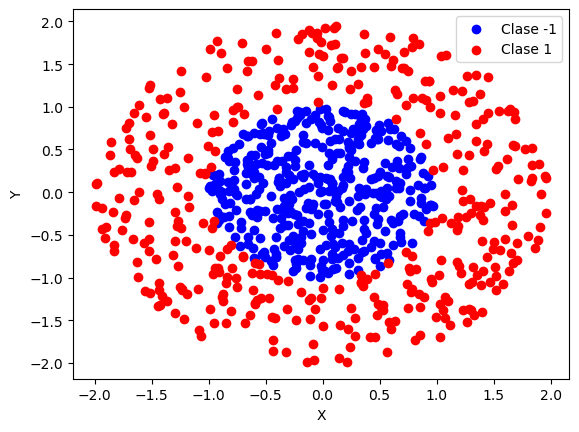

In [12]:
plt.scatter(x[z == -1.0], y[z == -1.0], color='blue', label='Clase -1')
plt.scatter(x[z == 1.0], y[z == 1.0], color='red', label='Clase 1')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

7. Utilice las funciones que implementó anteriormente para estandarizar y entrenar el modelo de clasificación con estos nuevos datos. Luego, grafique nuevamente la dispersión de estos datos estandarizados pero incluya ahora la frontera de decisión que definen los parámetros óptimos $w$ y $b$.

In [13]:
XY_scaled = standarized_data([x,y])
model_new = Model(XY_scaled,z)
y_vals = -(model_new["w"][0]*XY_scaled[:,0] + model_new["b"][0]) / model_new["w"][1]

In [14]:
model_new

{'model': LogisticRegression(),
 'w': array([ 0.08164796, -0.13908234]),
 'b': array([1.98137987e-05])}

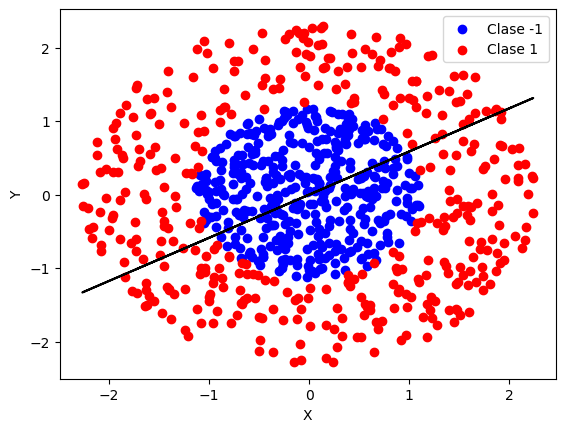

In [15]:
plt.scatter(XY_scaled[:,0][z == -1.0], XY_scaled[:,1][z == -1.0], color='blue', label='Clase -1')
plt.scatter(XY_scaled[:,0][z == 1.0], XY_scaled[:,1][z == 1.0], color='red', label='Clase 1')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.plot(XY_scaled[:,0],y_vals,color="k")

8. Utilice ahora la función que calcula la métrica que implementó anteriormente para evaluar el rendimiento de los datos nuevos, en el conjunto de validación importando los datos del archivo *classification_test.txt*.

In [16]:
Classification_Test = pd.read_csv("classification_test.txt",sep="\t")

x_new = Classification_Test["X"].to_numpy()
y_new = Classification_Test["Y"].to_numpy()
z_new = Classification_Test["Z"].to_numpy()

Classification_Test

,X,Y,Z
0,-1.316874,0.518335,1.0
1,-0.221583,-0.645454,-1.0
2,-0.938262,0.260068,-1.0
3,0.496321,0.495216,-1.0
4,-0.691133,-0.950022,1.0
...,...,...,...
195,-1.426388,-0.795688,1.0
196,1.813846,-0.115451,1.0
197,0.517194,-0.765915,-1.0
198,-1.315669,-1.032458,1.0


In [17]:
value = evaluate(model_new["model"],[x_new,y_new],z_new)
value

52.5

9. Responda las siguientes preguntas:

- Compare el gráfico de observaciones antes y después de estandarizar los datos, ¿cómo se estandarizan los datos?. **Hint**: Revise la documentación de la función utilizada para estandarizar.

**Antes**: cada característica conserva su escala original (ej. `radius_mean` entre 7 y 28, `smoothness_mean` entre 0.06 y 0.15).  
**Después**: la nube de puntos queda centrada en (0, 0) y cada eje está medido en “número de desviaciones estándar” (media 0, desviación 1).  
**Cómo se estandariza**: usando `StandardScaler` de scikit‑learn, que aplica  
  \[
    x_{\rm estandarizado} = \frac{x - \mu}{\sigma}
  \]  
  donde \(\mu\) es la media de la característica y \(\sigma\) su desviación estándar.



- Tomando como referencia el gráfico de dispersión que incluye la frontera de decisión para los datos de cancer de seno, ¿por dónde se trazó ésta recta, podemos decir que minimiza las distancias entre los puntos?


La recta no se trazó minimizando la suma de distancias perpendiculares de los puntos.  
En **regresión logística**, se ajusta para maximizar la verosimilitud de las etiquetas.  
En **SVM**, se elige la línea que maximiza el margen (distancia mínima a los puntos más cercanos).  
Por tanto, más que “minimizar distancias”, la frontera busca **maximizar** la probabilidad o el margen de separación.




- Tomando como referencia el gráfico de dispersión que incluye la frontera de decisión para los datos nuevos, ¿considera que el modelo lineal para la frontera de decisión funciona en estos datos?, ¿qué relación matemática podría funcionar mejor en este caso?

Un **modelo lineal** no puede separar un círculo interior de un anillo exterior con una línea.  
Se necesitan modelos **no lineales**, por ejemplo:  

**SVM con kernel RBF (Gaussiano)**  
**Clasificador polinómico** de grado ≥ 2 (para trazar circunferencias)  

Con estos enfoques se obtendría una frontera circular que encierre correctamente la clase interior.



- Fíjese que una forma *a priori* de evaluar el rendimiento del modelo de Clasificación puede ser la evaluación de la frontera de decisión: conforme mejor se separen las dos clases en este espacio de características mejor será la predicción del modelo. Teniendo en cuenta el comportamiento de la frontera de decisión en los datos sobre el cáncer de seno y el comportamiento que propone para los datos nuevos en la respuesta anterior, ¿cómo podríamos determinar desde este punto de vista gráfico si un dato está bien o mal clasificado?

Un punto está **bien clasificado** si queda del mismo lado de la frontera que el resto de su clase.  
Está **mal clasificado** si cae al lado opuesto de la línea (o superficie).  
La **distancia al hiperplano** (margen) indica la confianza de la predicción:  

    Muy lejos → alta confianza.  
    Muy cerca → caso borderline.  
    
Gráficamente, cuanto más nítida y limpia sea la separación entre clases en el espacio de características, mejor esperaremos que sea el rendimiento del modelo.

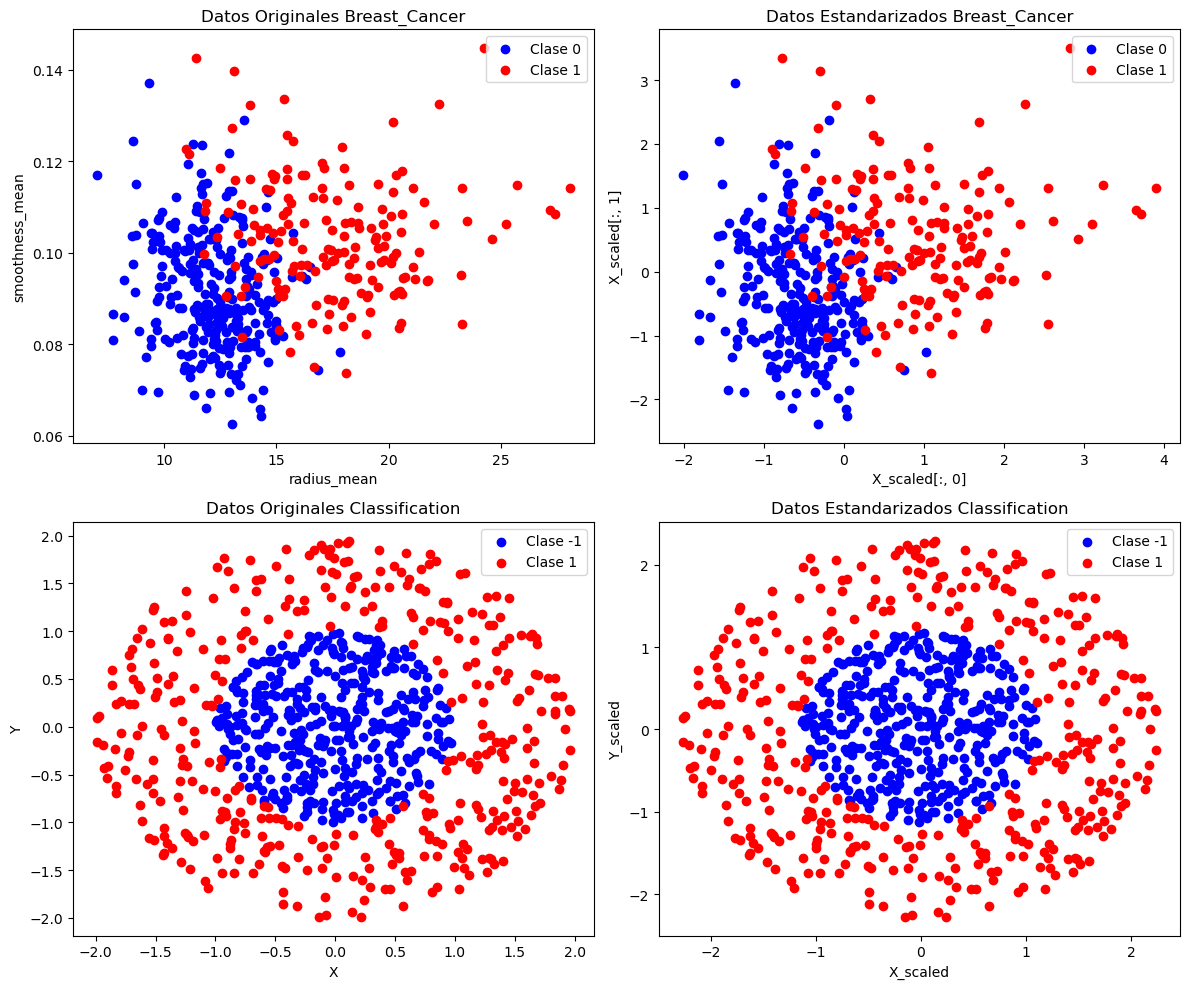

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

axs[0, 0].scatter(radius_mean[pronostic == 0], smoothness_mean[pronostic == 0], color='blue', label='Clase 0')
axs[0, 0].scatter(radius_mean[pronostic == 1], smoothness_mean[pronostic == 1], color='red', label='Clase 1')
axs[0, 0].set_title("Datos Originales Breast_Cancer")
axs[0, 0].set_xlabel("radius_mean")
axs[0, 0].set_ylabel("smoothness_mean")
axs[0, 0].legend()

axs[0, 1].scatter(X_scaled[pronostic == 0, 0], X_scaled[pronostic == 0, 1], color='blue', label='Clase 0')
axs[0, 1].scatter(X_scaled[pronostic == 1, 0], X_scaled[pronostic == 1, 1], color='red', label='Clase 1')
axs[0, 1].set_title("Datos Estandarizados Breast_Cancer")
axs[0, 1].set_xlabel("X_scaled[:, 0]")
axs[0, 1].set_ylabel("X_scaled[:, 1]")
axs[0, 1].legend()

axs[1, 1].scatter(XY_scaled[:,0][z == -1.0], XY_scaled[:,1][z == -1.0], color='blue', label='Clase -1')
axs[1, 1].scatter(XY_scaled[:,0][z == 1.0], XY_scaled[:,1][z == 1.0], color='red', label='Clase 1')
axs[1, 1].set_title("Datos Estandarizados Classification")
axs[1, 1].set_xlabel("X_scaled")
axs[1, 1].set_ylabel("Y_scaled")
axs[1, 1].legend()

axs[1, 0].scatter(x[z == -1.0], y[z == -1.0], color='blue', label='Clase -1')
axs[1, 0].scatter(x[z == 1.0], y[z == 1.0], color='red', label='Clase 1')
axs[1, 0].set_title("Datos Originales Classification")
axs[1, 0].set_xlabel("X")
axs[1, 0].set_ylabel("Y")
axs[1, 0].legend()

plt.tight_layout()
plt.show()